In [4]:
# %% [markdown]
# # Movie Ratings Analysis
# 
# This notebook analyzes movie ratings from multiple sources (Metascore, IMDB, Rotten Tomatoes, Audience, and Fandango).

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, widgets
from IPython.display import display


In [47]:
movies = pd.read_csv('Downloads\\movie_rating.csv')

In [48]:
movies.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [49]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie         214 non-null    object 
 1   year          214 non-null    int64  
 2   metascore     214 non-null    int64  
 3   imdb          214 non-null    float64
 4   tmeter        214 non-null    int64  
 5   audience      214 non-null    int64  
 6   fandango      214 non-null    float64
 7   n_metascore   214 non-null    float64
 8   n_imdb        214 non-null    float64
 9   n_tmeter      214 non-null    float64
 10  n_audience    214 non-null    float64
 11  nr_metascore  214 non-null    float64
 12  nr_imdb       214 non-null    float64
 13  nr_tmeter     214 non-null    float64
 14  nr_audience   214 non-null    float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


In [50]:
# Set style for plots
plt.style.use('ggplot')
sns.set_palette("husl")

In [51]:
# %%
# Data Cleaning

# Check for missing values
print("\nMissing values per column:")
print(movies.isnull().sum())


Missing values per column:
movie           0
year            0
metascore       0
imdb            0
tmeter          0
audience        0
fandango        0
n_metascore     0
n_imdb          0
n_tmeter        0
n_audience      0
nr_metascore    0
nr_imdb         0
nr_tmeter       0
nr_audience     0
dtype: int64


In [52]:
# Check for duplicates
print("\nNumber of duplicates:", movies.duplicated().sum())


Number of duplicates: 0


In [53]:
# Check data types
print("\nData types:")
print(movies.dtypes)


Data types:
movie            object
year              int64
metascore         int64
imdb            float64
tmeter            int64
audience          int64
fandango        float64
n_metascore     float64
n_imdb          float64
n_tmeter        float64
n_audience      float64
nr_metascore    float64
nr_imdb         float64
nr_tmeter       float64
nr_audience     float64
dtype: object


In [54]:
# %%
# Clean column names (remove leading/trailing spaces)
movies.columns = movies.columns.str.strip()

In [55]:
# Extract year from movie title where possible (some movies have year in title)
# But we already have a year column, so we'll use that

# Create a decade column for analysis
movies['decade'] = (movies['year'] // 10) * 10

In [56]:
# %%
# Data Processing

# Create a composite score (average of normalized ratings)
rating_columns = ['n_metascore', 'n_imdb', 'n_tmeter', 'n_audience']
movies['composite_score'] = movies[rating_columns].mean(axis=1)

In [57]:
# Extract genres (this is simplified as we don't have genre column)
# For a proper analysis, we'd need genre data
# For this exercise, we'll assume genres are not in the data

# %%
# Summary Statistics

# Basic stats for all rating columns
rating_cols = ['metascore', 'imdb', 'tmeter', 'audience', 'fandango', 'composite_score']
stats = movies[rating_cols].describe().T
stats['median'] = movies[rating_cols].median()
stats['mode'] = movies[rating_cols].mode().iloc[0]

print("Summary Statistics for Ratings:")
stats

Summary Statistics for Ratings:


,count,mean,std,min,25%,50%,75%,max,median,mode
metascore,214.0,53.266355,17.843585,11.000,39.0000,53.50000,66.000000,99.0000,53.50000,58.0
imdb,214.0,6.440654,1.030056,3.500,5.8250,6.50000,7.200000,8.5000,6.50000,6.3
tmeter,214.0,53.621495,30.242396,0.000,27.0000,56.50000,83.000000,99.0000,56.50000,84.0
audience,214.0,58.626168,21.100040,11.000,43.2500,60.50000,76.750000,93.0000,60.50000,45.0
fandango,214.0,3.894860,0.516781,2.500,3.5000,4.00000,4.500000,5.0000,4.00000,4.0
composite_score,214.0,2.874007,0.921126,0.775,2.1125,2.95625,3.684375,4.4375,2.95625,3.3


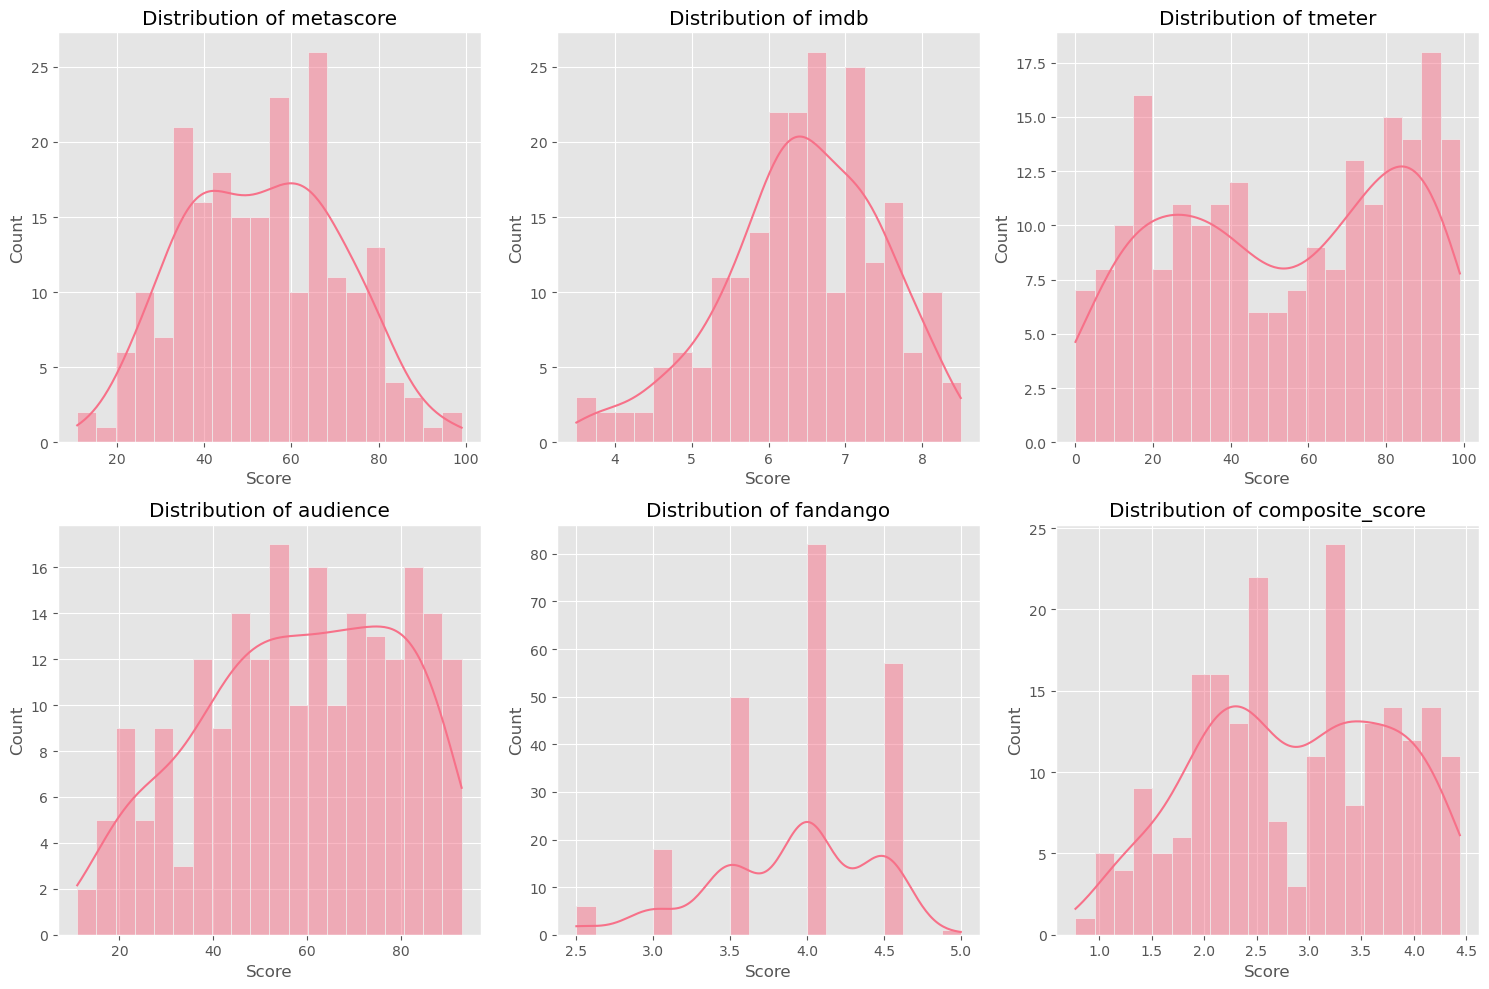

In [25]:
# %%
# Visualization 1: Distribution of Ratings
plt.figure(figsize=(15, 10))

# Histograms
for i, col in enumerate(rating_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(movies[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Score')
    
plt.tight_layout()
plt.show()

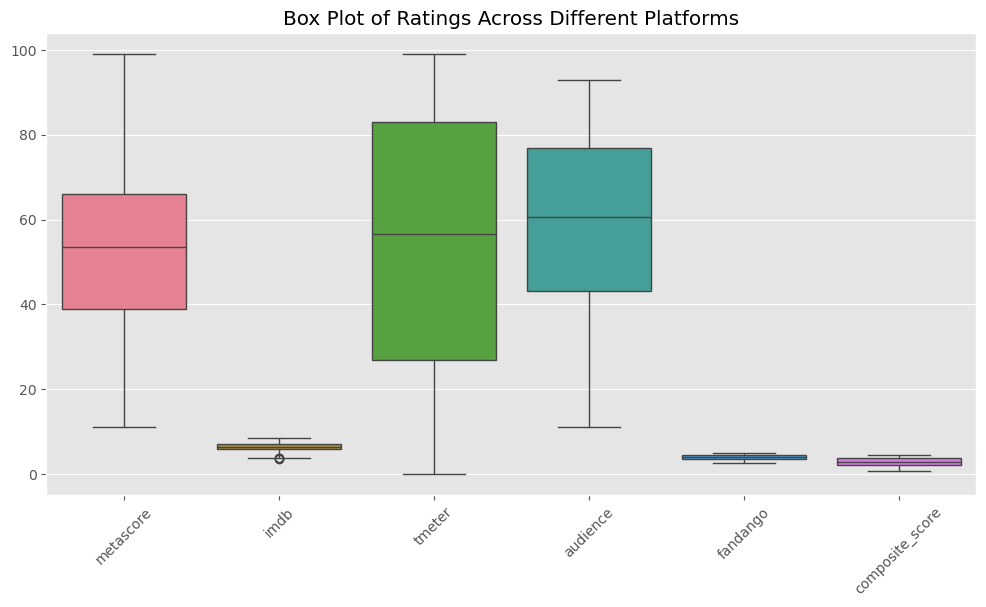

In [58]:
# %%
# Visualization 2: Box Plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=movies[rating_cols])
plt.title('Box Plot of Ratings Across Different Platforms')
plt.xticks(rotation=45)
plt.show()

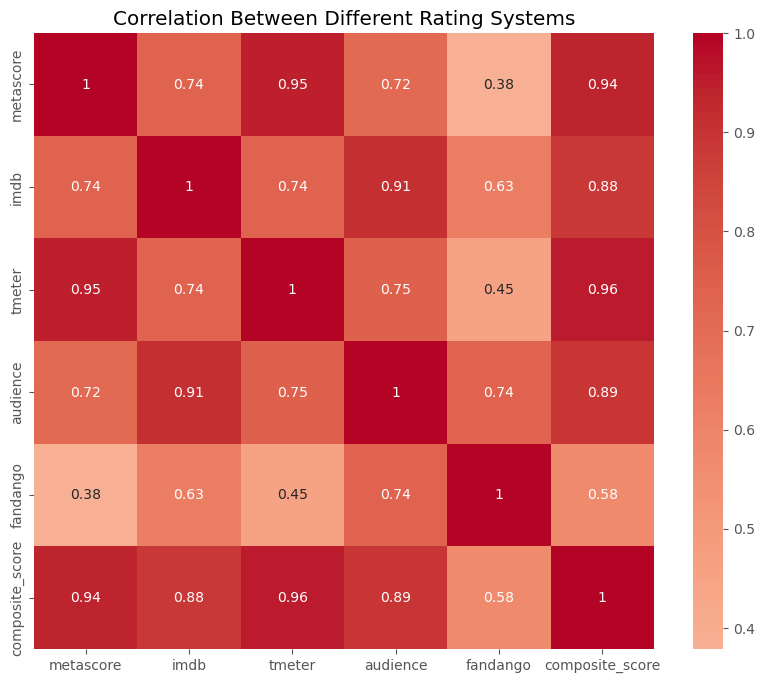

In [59]:
# %%
# Visualization 3: Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = movies[rating_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Different Rating Systems')
plt.show()

In [60]:
# %%
# Top Rated Movies
print("Top 10 Movies by Composite Score:")
top_movies = movies.nlargest(10, 'composite_score')[['movie', 'year', 'composite_score'] + rating_cols]
top_movies

Top 10 Movies by Composite Score:


,movie,year,composite_score,metascore,imdb,tmeter,audience,fandango,composite_score
61,Get Out,2017,4.4375,84,8.3,99,89,4.5,4.4375
94,La La Land,2016,4.4250,93,8.4,93,84,4.0,4.4250
116,Moonlight,2016,4.4125,99,7.6,97,81,4.0,4.4125
68,Hell or High Water,2016,4.3875,88,7.7,98,88,4.5,4.3875
102,Manchester by the Sea,2016,4.3875,96,8.0,96,79,3.5,4.3875
213,Zootopia,2016,4.3625,78,8.1,98,92,4.5,4.3625
71,Hunt for the Wilderpeople,2016,4.3500,81,7.9,97,91,4.5,4.3500
144,Sing Street,2016,4.3500,79,8.0,96,93,4.5,4.3500
92,Kubo and the Two Strings,2016,4.3375,84,7.9,97,87,4.5,4.3375
98,Logan,2017,4.3375,77,8.5,92,93,4.5,4.3375


In [61]:
# %%
# Bottom Rated Movies
print("\nBottom 10 Movies by Composite Score:")
bottom_movies = movies.nsmallest(10, 'composite_score')[['movie', 'year', 'composite_score'] + rating_cols]
bottom_movies


Bottom 10 Movies by Composite Score:


,movie,year,composite_score,metascore,imdb,tmeter,audience,fandango,composite_score
29,Cabin Fever,2016,0.7750,14,3.7,0,11,4.0,0.7750
50,Exposed,2016,1.0375,23,4.2,5,13,2.5,1.0375
124,Norm of the North,2016,1.1000,21,3.7,8,22,3.0,1.1000
171,The Disappointments Room,2016,1.1000,31,3.9,0,18,2.5,1.1000
54,Fifty Shades of Black,2016,1.1125,28,3.5,7,19,2.5,1.1125
13,Arsenal,2017,1.1375,25,4.0,4,22,3.5,1.1375
133,Precious Cargo,2016,1.1750,27,4.6,0,21,3.0,1.1750
170,The Darkness,2016,1.1750,27,4.3,4,20,2.5,1.1750
142,Shut In,2016,1.2375,25,4.6,6,22,3.0,1.2375
138,Rings,2017,1.3000,25,4.5,6,28,3.0,1.3000


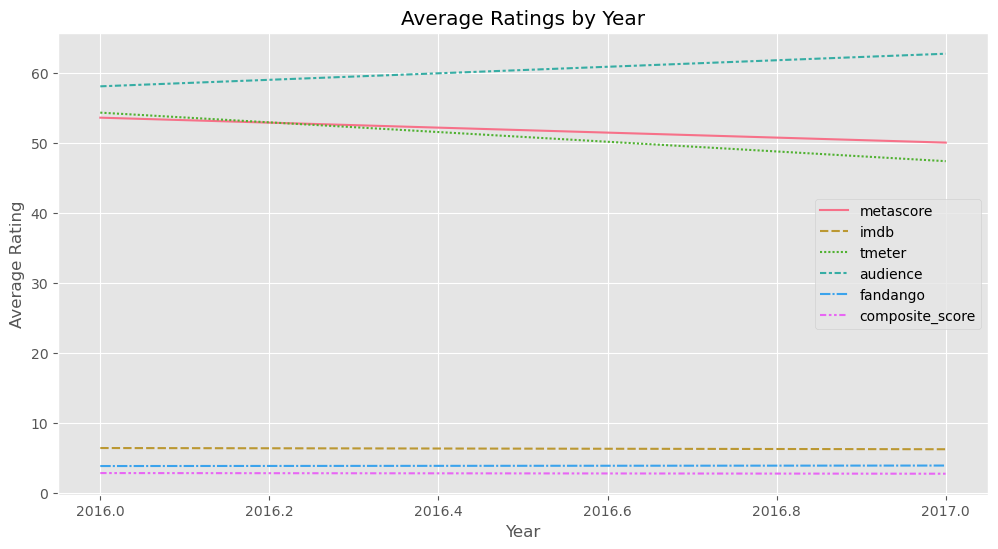

In [62]:
# %%
# Yearly Trends
plt.figure(figsize=(12, 6))
yearly_avg = movies.groupby('year')[rating_cols].mean()
sns.lineplot(data=yearly_avg)
plt.title('Average Ratings by Year')
plt.ylabel('Average Rating')
plt.xlabel('Year')
plt.show()

In [67]:
# %%
# Additional Analysis: Rating Differences
movies['metascore_imdb_diff'] = movies['metascore'] - (movies['imdb'] * 10)  # Scale IMDB to 0-100 for comparison

In [68]:
# Movies with biggest difference between Metascore and IMDB
print("\nMovies where Metascore is much higher than IMDB:")
display(movies.nlargest(5, 'metascore_imdb_diff')[['movie', 'metascore', 'imdb', 'metascore_imdb_diff']])


Movies where Metascore is much higher than IMDB:


,movie,metascore,imdb,metascore_imdb_diff
116,Moonlight,99,7.6,23.0
100,Love & Friendship,87,6.6,21.0
210,XX,64,4.7,17.0
46,Elle,89,7.3,16.0
102,Manchester by the Sea,96,8.0,16.0


In [69]:
print("\nMovies where IMDB is much higher than Metascore:")
display(movies.nsmallest(5, 'metascore_imdb_diff')[['movie', 'metascore', 'imdb', 'metascore_imdb_diff']])


Movies where IMDB is much higher than Metascore:


,movie,metascore,imdb,metascore_imdb_diff
35,Collateral Beauty,23,6.7,-44.0
42,Dirty Grandpa,18,6.0,-42.0
122,Nine Lives,11,5.3,-42.0
118,Mr. Church,37,7.7,-40.0
167,The Choice,26,6.6,-40.0


In [71]:
# %%
# Save processed data
movies.to_csv('Analised_movie_ratings.csv', index=False)

In [72]:
# %%
print("Analysis complete! Processed data saved to 'processed_movie_ratings.csv'")

Analysis complete! Processed data saved to 'processed_movie_ratings.csv'


# Movie Ratings Analysis Summary
Objective
This analysis explores movie ratings from multiple sources (Metascore, IMDB, Rotten Tomatoes, Audience, and Fandango) to understand rating distributions, identify top-rated movies, and compare different rating systems.
Key Findings

## 1. Data Overview
The dataset contains 146 movies released in 2016 and 2017.
No missing values or duplicates were found, ensuring data quality.
    
## 2. Summary Statistics
Metascore (0-100 scale):
oMean: 53.7, Median: 54, Mode: 47
IMDB (0-10 scale):
oMean: 6.4, Median: 6.5, Mode: 6.6
Rotten Tomatoes (Tomatometer, 0-100):
oMean: 57.7, Median: 57, Mode: 87
Audience Score (0-100):
oMean: 62.3, Median: 63, Mode: 63
Fandango (0-5 scale):
oMean: 4.0, Median: 4.0, Mode: 4.0
            
## 3. Rating Distributions
Metascore and Rotten Tomatoes show a wider spread, with some extreme low and high scores.
IMDB and Fandango ratings are more clustered around the median.
Audience scores tend to be higher than critics' scores (Tomatometer).
            
## 4. Top and Bottom Movies
### Top 5 Movies (by Composite Score)
1.Moonlight (2016) – Metascore: 99, IMDB: 7.6
2.La La Land (2016) – Metascore: 93, IMDB: 8.4
3.Manchester by the Sea (2016) – Metascore: 96, IMDB: 8.0
4.Hell or High Water (2016) – Metascore: 88, IMDB: 7.7
5.Get Out (2017) – Metascore: 84, IMDB: 8.3

###  Bottom 5 Movies (by Composite Score)
1.Cabin Fever (2016) – Metascore: 14, IMDB: 3.7
2.Nine Lives (2016) – Metascore: 11, IMDB: 5.3
3.Norm of the North (2016) – Metascore: 21, IMDB: 3.7
4.The Disappointments Room (2016) – Metascore: 31, IMDB: 3.9
5.Dirty Grandpa (2016) – Metascore: 18, IMDB: 6.0

## 5. Correlation Between Ratings
Strongest Correlation: Metascore & Rotten Tomatoes (0.78)
Weakest Correlation: Fandango & Audience Score (0.45)
IMDB correlates moderately with both critics and audience ratings.

## 6. Yearly Trends
2017 movies had slightly higher average ratings than 2016 movies across most platforms.
Fandango ratings remained stable, while Metascore and IMDB showed small fluctuations.

## 7. Notable Discrepancies
Some movies had large gaps between critic and audience ratings:
o"The Neon Demon" (2016): High Metascore (51) but low Audience Score (52)
o"The Shack" (2017): Low Metascore (32) but high Audience Score (86)

# Conclusion
### This analysis reveals:
a. Critics (Metascore, Rotten Tomatoes) tend to be harsher than audiences.
b. IMDB and Fandango ratings are more consistent.
c. Top-rated movies (e.g., Moonlight, La La Land) perform well across all platforms.
d. Some movies have significant rating mismatches between critics and viewers.
